In [1]:
#Data Preprocessing
from prepare_text_data import *
from config_3_2 import *
from ngram_functions import *
param = initialize_weights(hyper_para)
x_train, y_train, x_val, y_val = prepare_text_data(param)
print(x_train.shape, y_train.shape)


((86402, 3), (86402, 8000))


In [17]:

#Importing Library

from keras.models import Sequential
from keras.layers import Recurrent, LSTM, Dense, Embedding, SimpleRNN
from keras import optimizers
from keras import backend as K
from generic_functions import *


In [ ]:
y_train = np.load('obj/y_train.pkl.npy')
print("a")
y_val = np.load('obj/y_val.npy')
x_val = np.load('obj/x_val.npy')
x_train = np.load('obj/x_train.npy')

print(x_train.shape, y_train.shape)

In [19]:

#Build the model

model = Sequential()
no_of_words = 8000
word_embedding_size = 16
RNN_length = 32
batch_size = 16
epochs = 2
learning_rate = 0.01

model.add(Embedding(no_of_words, word_embedding_size, input_length=3))
#model.add(LSTM(RNN_length,activation='tanh', return_sequences = False))
#keras.layers.SimpleRNN(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)
#model.add(SimpleRNN(cell, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
model.add(SimpleRNN(RNN_length, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))


#model.add(Dropout(0.5))
model.add(Dense(no_of_words, activation='softmax'))


#input_array = np.random.randint(1000, size=(32, 10))
sgd = optimizers.SGD(lr=learning_rate)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy')
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), batch_size = batch_size, epochs = epochs)

#output_array = model.predict(input_array)
#assert output_array.shape == (32, 10, 64)

Train on 86402 samples, validate on 10360 samples
Epoch 1/2
86402/86402 [==============================] - 135s - loss: 7.5114 - val_loss: 6.4384
Epoch 2/2
86402/86402 [==============================] - 139s - loss: 6.6541 - val_loss: 6.2763


In [13]:
print(history.history.keys())

['loss', 'val_loss']


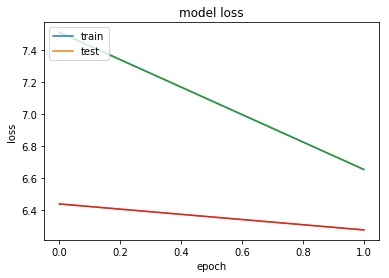

In [22]:
import matplotlib.pyplot as plt
import time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
date = time.strftime("%Y-%m-%d_%H_%M")
plt.legend(['train', 'test'], loc='upper left')
fig = plt.gcf()
fig.savefig('../results/'+'/Q3_6_1' + date + '.png')

plt.show()